In [501]:
#Dec 28 Prediction- 14 day window , 7 day prediction
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# X_train = pd.read_csv("weekly_agg_county/x_train_county_aggregated_weekly.csv",index_col=0)
# y_train = pd.read_csv("weekly_agg_county/y_train_county_aggregated_weekly.csv",index_col=0)
# X_test = pd.read_csv("weekly_agg_county/x_test_county_aggregated_weekly.csv",index_col=0)
# y_test = pd.read_csv("weekly_agg_county/y_test_county_aggregated_weekly.csv",index_col=0)

# X_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_train.csv",index_col=0)
# y_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_train.csv",index_col=0)
# X_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_test.csv",index_col=0)
# y_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_test.csv",index_col=0)

X_train = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/x_train.csv",index_col=0)
y_train = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/y_train.csv",index_col=0)
X_val = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/x_val.csv",index_col=0)
y_val = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/y_val.csv",index_col=0)


X_test = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/x_test.csv",index_col=0)
y_test = pd.read_csv("/data/BHI_G5/daily_agg_county/Dec28_2021_Pred/14DayWin_7DayPred/y_test.csv",index_col=0)

In [260]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [261]:
pip install skforecast

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [500]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

#xg_reg = ForecasterAutoregMultiOutput(xgb.XGBRegressor((objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, alpha = 10, n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7)), steps = 36, lag = 8)
#xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', num_round = 100, colsample_bytree = 0.3, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 500))
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.03, max_depth = 6, min_child_weight = 4, alpha = 0, n_estimators = 500, nthread = 4, silent = 1, subsample = 1))

In [475]:
y_trainfirst = y_train.iloc[:,0]
y_valfirst = y_val.iloc[:,0]

In [476]:
#y_train

In [477]:
#y_train = pd.Series(y_train)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_val)

[23:37:24] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:37:25] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:37:27] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

In [478]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, preds)
print("MAE: %f" % (mae))

mse = mean_squared_error(y_val, preds)
print("MSE: %f" % (mse))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val, preds)
print("MAPE: %f" % (mape))

RMSE: 0.420529
MAE: 0.308629
MSE: 0.176844
MAPE: 0.336058


In [479]:
# def mean_absolute_percentage_error(y_val, preds): 
#     y_true, y_pred = np.array(y_val), np.array(preds)
#     return np.mean(np.abs((y_val - preds) / y_val)) * 100

# mean_absolute_percentage_error

In [480]:
mappp = np.mean(np.abs((y_val - preds) / y_val)) * 100
mappp

metrics.deathDensity(t)      35.183256
metrics.caseDensity(t)       14.049360
metrics.deathDensity(t+1)    35.184203
metrics.caseDensity(t+1)     20.642572
metrics.deathDensity(t+2)    35.050922
metrics.caseDensity(t+2)     24.032959
metrics.deathDensity(t+3)    34.992520
metrics.caseDensity(t+3)     30.400385
metrics.deathDensity(t+4)    35.085544
metrics.caseDensity(t+4)     34.646184
metrics.deathDensity(t+5)    35.146998
metrics.caseDensity(t+5)     33.328749
metrics.deathDensity(t+6)    35.288320
metrics.caseDensity(t+6)     67.449617
dtype: float64

In [481]:
preds

array([[0.77728873, 1.1787332 , 0.78343093, ..., 1.3375882 , 0.8040485 ,
        1.3958943 ],
       [0.77736634, 1.2381285 , 0.78343093, ..., 1.3445649 , 0.80411625,
        1.402251  ],
       [0.77736634, 1.2746857 , 0.78343093, ..., 1.3411173 , 0.80411625,
        1.3970917 ],
       ...,
       [0.76769274, 0.7049761 , 0.7723727 , ..., 0.57537174, 0.7983302 ,
        0.50390923],
       [0.7676325 , 0.7789903 , 0.77215874, ..., 0.7957141 , 0.7982295 ,
        0.7471892 ],
       [0.7677923 , 0.8477967 , 0.7724224 , ..., 1.0967797 , 0.7983927 ,
        1.0344214 ]], dtype=float32)

In [482]:
#rolmean = df['metrics.caseDensity'].rolling(7).mean()

In [483]:
preds.shape

(124, 14)

In [484]:
y_test

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-12-28,1.689269,0.933876,1.697723,1.192731,1.703014,1.597368,1.706753,1.976255,1.707339,2.324356,1.707670,2.669930,1.716362,2.998285
2021-12-29,1.697723,1.192731,1.703014,1.597368,1.706753,1.976255,1.707339,2.324356,1.707670,2.669930,1.716362,2.998285,1.726071,3.382862
2021-12-30,1.703014,1.597368,1.706753,1.976255,1.707339,2.324356,1.707670,2.669930,1.716362,2.998285,1.726071,3.382862,1.735995,3.773047
2021-12-31,1.706753,1.976255,1.707339,2.324356,1.707670,2.669930,1.716362,2.998285,1.726071,3.382862,1.735995,3.773047,1.743888,4.139958
2022-01-01,1.707339,2.324356,1.707670,2.669930,1.716362,2.998285,1.726071,3.382862,1.735995,3.773047,1.743888,4.139958,1.751502,4.579833
2022-01-02,1.707670,2.669930,1.716362,2.998285,1.726071,3.382862,1.735995,3.773047,1.743888,4.139958,1.751502,4.579833,1.753093,4.882025
2022-01-03,1.716362,2.998285,1.726071,3.382862,1.735995,3.773047,1.743888,4.139958,1.751502,4.579833,1.753093,4.882025,1.753564,5.146900


In [485]:
X_test

,actuals.cases(t-14),actuals.deaths(t-14),metrics.deathDensity(t-14),metrics.caseDensity(t-14),metrics.testPositivityRatio(t-14),cdcTransmissionLevel(t-14),riskLevels.caseDensity(t-14),riskLevels.overall(t-14),metrics.vaccinationsCompletedRatio(t-14),metrics.vaccinationsInitiatedRatio(t-14),...,actuals.cases(t-1),actuals.deaths(t-1),metrics.deathDensity(t-1),metrics.caseDensity(t-1),metrics.testPositivityRatio(t-1),cdcTransmissionLevel(t-1),riskLevels.caseDensity(t-1),riskLevels.overall(t-1),metrics.vaccinationsCompletedRatio(t-1),metrics.vaccinationsInitiatedRatio(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2021-12-28,1.569240,1.517278,1.593205,0.525503,0.308840,0.723740,0.669739,0.698145,1.568454,1.571474,...,1.722714,1.589606,1.678538,0.799705,1.556769,1.076572,0.938875,0.981168,1.594638,1.604732
2021-12-29,1.578445,1.525875,1.604682,0.513246,0.303534,0.725525,0.656734,0.688497,1.571768,1.575032,...,1.742137,1.599243,1.689269,0.933876,1.965200,1.120363,1.042326,1.095767,1.597481,1.608428
2021-12-30,1.587261,1.530244,1.610184,0.506959,0.350104,0.750991,0.657101,0.696547,1.574241,1.578593,...,1.770394,1.608614,1.697723,1.192731,2.426665,1.140712,1.203863,1.267910,1.599818,1.611183
2021-12-31,1.598524,1.538556,1.619036,0.484534,0.364691,0.775505,0.643362,0.679188,1.577478,1.582157,...,1.800433,1.613965,1.703014,1.597368,2.808328,1.164155,1.448258,1.511700,1.601887,1.613710
2022-01-01,1.603017,1.540548,1.620503,0.495087,0.386731,0.821557,0.672871,0.695687,1.579838,1.585331,...,1.840987,1.618806,1.706753,1.976255,3.054698,1.180934,1.649658,1.700464,1.604240,1.617191
2022-01-02,1.607056,1.541107,1.620854,0.517791,0.398524,0.844762,0.705455,0.721832,1.581480,1.587574,...,1.848146,1.619837,1.707339,2.324356,3.196265,1.191882,1.832665,1.886740,1.604879,1.618208
2022-01-03,1.622176,1.546830,1.628391,0.535166,0.444187,0.865587,0.731663,0.745950,1.582737,1.589210,...,1.863518,1.620396,1.707670,2.669930,3.336424,1.194738,1.984893,2.047977,1.605442,1.618980


In [486]:
# y_pred.shape
col = y_test.columns

In [487]:
y_pred = xg_reg.predict(X_test)
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-12-28,0.767254,0.867109,0.772339,0.899966,0.778644,0.962047,0.785654,1.052479,0.790722,1.081068,0.795813,1.216992,0.798410,1.214035
2021-12-29,0.767325,0.998712,0.772286,1.030094,0.778894,1.026097,0.785785,1.125158,0.790722,1.178242,0.795813,1.303442,0.798473,1.327530
2021-12-30,0.767357,1.242622,0.772276,1.270199,0.778905,1.235806,0.785549,1.390794,0.791111,1.363316,0.795897,1.423623,0.798449,1.396955
2021-12-31,0.768602,1.563163,0.772809,1.537043,0.779607,1.454592,0.786169,1.483287,0.791227,1.404017,0.795969,1.444025,0.799164,1.408708
2022-01-01,0.770364,1.755715,0.775111,1.655480,0.781882,1.537568,0.787707,1.505894,0.792196,1.418804,0.796579,1.448217,0.800371,1.420014
2022-01-02,0.776764,1.780840,0.783190,1.664158,0.789049,1.547843,0.793351,1.523616,0.795654,1.433502,0.798449,1.451880,0.803607,1.414165
2022-01-03,0.777455,1.784659,0.783741,1.670946,0.789490,1.568723,0.793720,1.560534,0.795720,1.417254,0.798696,1.441620,0.803945,1.374612


In [488]:
y_pred_df.head(7)

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-12-28,0.767254,0.867109,0.772339,0.899966,0.778644,0.962047,0.785654,1.052479,0.790722,1.081068,0.795813,1.216992,0.798410,1.214035
2021-12-29,0.767325,0.998712,0.772286,1.030094,0.778894,1.026097,0.785785,1.125158,0.790722,1.178242,0.795813,1.303442,0.798473,1.327530
2021-12-30,0.767357,1.242622,0.772276,1.270199,0.778905,1.235806,0.785549,1.390794,0.791111,1.363316,0.795897,1.423623,0.798449,1.396955
2021-12-31,0.768602,1.563163,0.772809,1.537043,0.779607,1.454592,0.786169,1.483287,0.791227,1.404017,0.795969,1.444025,0.799164,1.408708
2022-01-01,0.770364,1.755715,0.775111,1.655480,0.781882,1.537568,0.787707,1.505894,0.792196,1.418804,0.796579,1.448217,0.800371,1.420014
2022-01-02,0.776764,1.780840,0.783190,1.664158,0.789049,1.547843,0.793351,1.523616,0.795654,1.433502,0.798449,1.451880,0.803607,1.414165
2022-01-03,0.777455,1.784659,0.783741,1.670946,0.789490,1.568723,0.793720,1.560534,0.795720,1.417254,0.798696,1.441620,0.803945,1.374612


In [489]:
new_y_pred_df=y_pred_df.iloc[::6, :]
new_y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-12-28,0.767254,0.867109,0.772339,0.899966,0.778644,0.962047,0.785654,1.052479,0.790722,1.081068,0.795813,1.216992,0.798410,1.214035
2022-01-03,0.777455,1.784659,0.783741,1.670946,0.789490,1.568723,0.793720,1.560534,0.795720,1.417254,0.798696,1.441620,0.803945,1.374612


In [490]:
#Case Density DataFrame
cases_y_pred_df = new_y_pred_df
cases_y_pred_df = cases_y_pred_df.drop(['metrics.deathDensity(t)', 'metrics.deathDensity(t+1)', 'metrics.deathDensity(t+2)', 'metrics.deathDensity(t+3)', 'metrics.deathDensity(t+4)', 'metrics.deathDensity(t+5)', 'metrics.deathDensity(t+6)'], axis = 1)
cases_y_pred_df

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2021-12-28,0.867109,0.899966,0.962047,1.052479,1.081068,1.216992,1.214035
2022-01-03,1.784659,1.670946,1.568723,1.560534,1.417254,1.441620,1.374612


In [491]:
# death_y_pred_df = new_y_pred_df
# death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
# death_y_pred_df

In [492]:
#case density
df_new1 = pd.DataFrame({'date': pd.date_range('2021-12-28','2022-01-10')})

transposecase_y_pred_df = cases_y_pred_df.T
ransposecase_y_pred_df = transposecase_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff1= ransposecase_y_pred_df.iloc[:,2]
dff1

dfff1=pd.DataFrame(dff1)
#dfff1.drop(dfff1.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new1['date'] = pd.to_datetime(df_new1['date'])

df_new1.set_index('date')
new_df1 = pd.concat([df_new1, dfff1], axis=1)
new_df1.set_index('date')

,0
date,
2021-12-28,0.867109
2021-12-29,1.784659
2021-12-30,0.899966
2021-12-31,1.670946
2022-01-01,0.962047
2022-01-02,1.568723
2022-01-03,1.052479
2022-01-04,1.560534
2022-01-05,1.081068


In [493]:
#death density not needed 
# transposedeath_y_pred_df = death_y_pred_df.T
# ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
# #dff=y_pred_df
# dff= ransposedeath_y_pred_df.iloc[:,2]


# dfff=pd.DataFrame(dff)
# dfff.drop(dfff.tail(2).index, inplace = True)


# y_pred_df_date = y_pred_df.iloc[:,0]
# y_pred_df_date

# #new_df = pd.concat([y_pred_df_date, dfff], axis=1)
# #new_df
# #deathpred=y_pred_df
# #deathpred['predicted']= dfff
# #deathpred.predicted = deathpred.predicted.astype(float)
#deathpred
#deathpred = [y_pred_df, dfff]
#deathpred

In [494]:
death_y_pred_df = new_y_pred_df
death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
death_y_pred_df

,metrics.deathDensity(t),metrics.deathDensity(t+1),metrics.deathDensity(t+2),metrics.deathDensity(t+3),metrics.deathDensity(t+4),metrics.deathDensity(t+5),metrics.deathDensity(t+6)
date,,,,,,,
2021-12-28,0.767254,0.772339,0.778644,0.785654,0.790722,0.795813,0.798410
2022-01-03,0.777455,0.783741,0.789490,0.793720,0.795720,0.798696,0.803945


In [495]:
#Death Density
df_new = pd.DataFrame({'date': pd.date_range('2021-12-28','2022-01-10')})

transposedeath_y_pred_df = death_y_pred_df.T
ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff= ransposedeath_y_pred_df.iloc[:,2]


dfff=pd.DataFrame(dff)
#dfff.drop(dfff.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new['date'] = pd.to_datetime(df_new['date'])

df_new.set_index('date')
new_df = pd.concat([df_new, dfff], axis=1)
new_df.set_index('date')

,0
date,
2021-12-28,0.767254
2021-12-29,0.777455
2021-12-30,0.772339
2021-12-31,0.783741
2022-01-01,0.778644
2022-01-02,0.789490
2022-01-03,0.785654
2022-01-04,0.793720
2022-01-05,0.790722


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


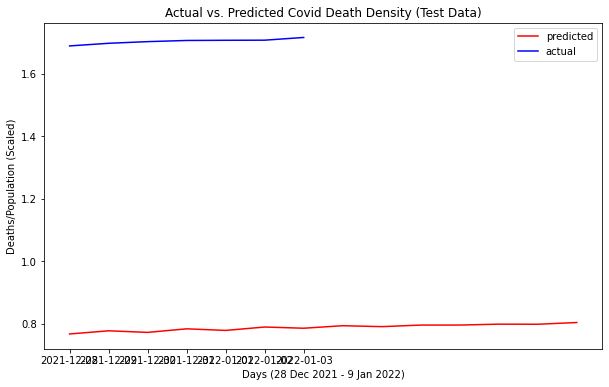

In [496]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(new_df[0], color='red')
plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
plt.ylabel('Deaths/Population (Scaled)')
plt.xlabel('Days (28 Dec 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])

In [497]:
# for col in y_pred_df.columns:    
#     print(col)

In [498]:
# import pandas as pd
# #y_pred_df[:,1] = pd.DatetimeIndex(y_pred_df['date'].values)
# new_y_pred_df = y_pred_df.groupby(pd.Grouper(key='metrics.deathDensity(t)', axis=0, freq='7D', sort=True)).mean()
# new_y_pred_df

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


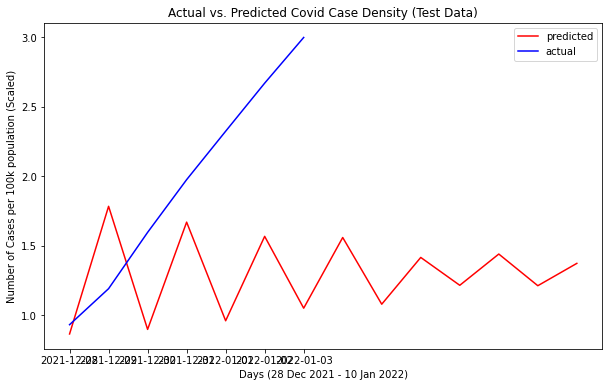

In [499]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(new_df1[0], color='red')
plt.plot(y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population (Scaled)')
plt.xlabel('Days (28 Dec 2021 - 10 Jan 2022)')
plt.legend(['predicted', 'actual'])

In [337]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])

<AxesSubplot:>

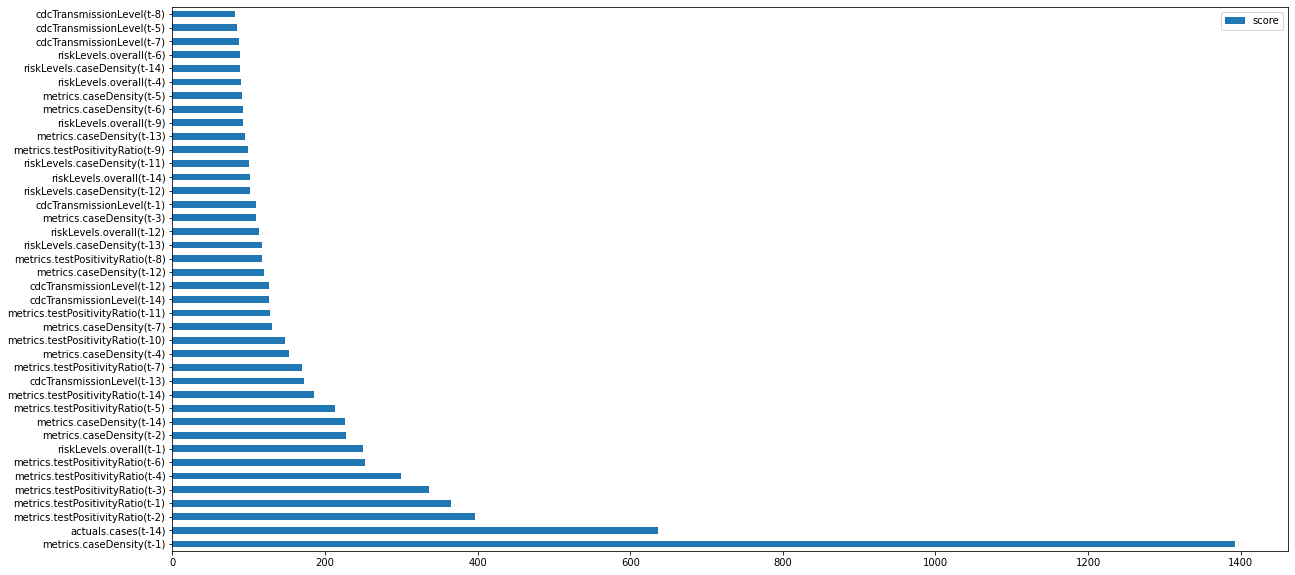

In [256]:
# Change estimators[?] to 0 for deaths and 1 for cases
feature_important = xg_reg.estimators_[1].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

%matplotlib inline
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [257]:
X_train.columns.tolist()[43]

'metrics.caseDensity(t-10)'

In [258]:
newindices = []
for index in data.index:
    index = int((index.lstrip('f'))
    newindex = X_train.columns.tolist()[index]
    newindices.append(newindex)
    
data.index = newindices

SyntaxError: invalid syntax (<ipython-input-258-d654423a136e>, line 4)

Text(0.5, 1.0, 'Covid Death Density Feature Importance')

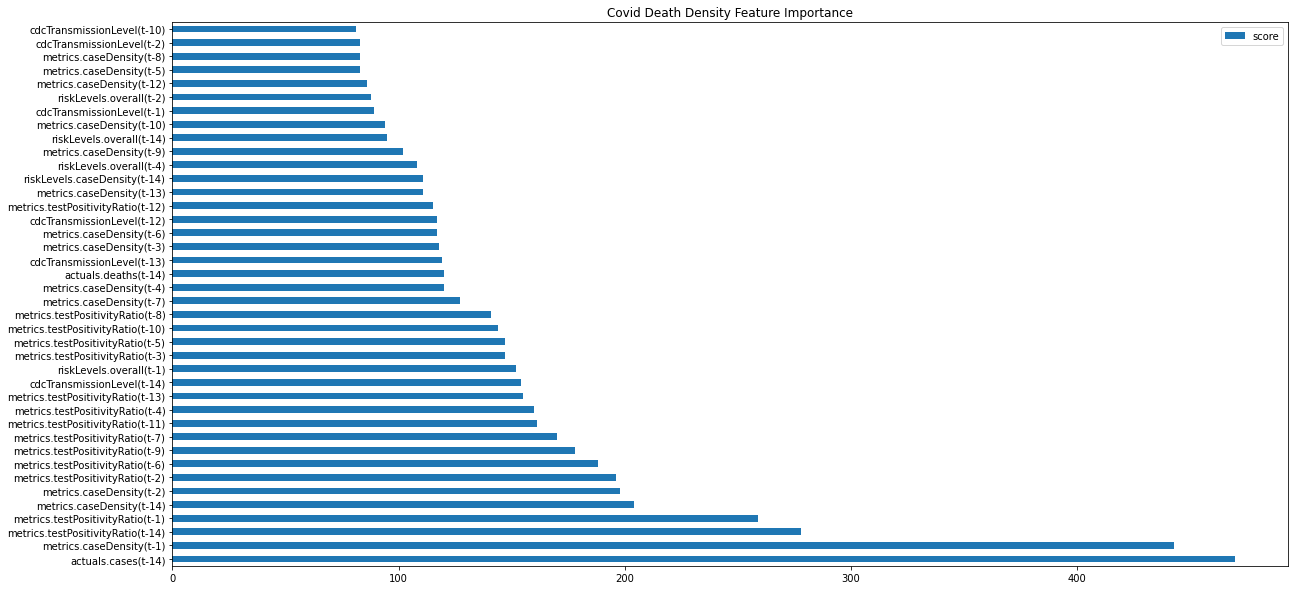

In [150]:
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features
plt.title('Covid Death Density Feature Importance')

In [151]:
# concatenate all x and all y separately for feature importance

In [152]:
pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [153]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [154]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import lightgbm as lgb

def objective_function(params):
    clf = lgb.LGBMClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

In [155]:
from hyperopt import hp
import numpy as np

space= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'n_estimators': hp.quniform('n_estimators', 5, 35, 1),
    'num_leaves': hp.quniform('num_leaves', 5, 50, 1),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

In [156]:
from hyperopt import tpe

tpe_algorithm = tpe.suggest

In [157]:
from hyperopt import Trials

trials = Trials()

In [158]:
import csv

# File to save first results
out_file = 'gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [159]:
from hyperopt import fmin, tpe, Trials

import numpy as np

num_eval = 500

trials = Trials()

best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_eval, trials=trials, rstate= np.random.RandomState(1))

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'integers'

In [160]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


train_df = X_train #pd.read_csv('../input/train.csv', dtype={'id': np.int32, 'target': np.int8})
Y = y_train #train_df['target'].values
X = X_train #train_df.drop(['target', 'id'], axis=1)
test_df = y_test #pd.read_csv('../input/test.csv', dtype={'id': np.int32})
test = y_test #test_df.drop(['id'], axis=1)

In [161]:
params = {}

In [162]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

TypeError: estimator should be an estimator implementing 'fit' method, <module 'xgboost' from '/home/mainuser/.local/lib/python3.8/site-packages/xgboost/__init__.py'> was passed

In [163]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:


AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [164]:
y_test = random_search.predict_proba(test)
results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

AttributeError: module 'xgboost' has no attribute 'predict_proba'

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
'objective':['reg:linear'],
'learning_rate': [.03, 0.05, .07], #so called `eta` value
'max_depth': [5, 6, 7],
'min_child_weight': [4],
'silent': [1],
'subsample': [0.7],
'colsample_bytree':[0.7],
'n_estimators': [500]}
xgb_grid = GridSearchCV(xg_reg,parameters,cv = 10, n_jobs = 2, verbose=1) #cv= Number of folds (Default to 10)



xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [165]:
from xgboost import plot_importance, plot_tree

plot_importance(xg_reg._Booster, height=0.9)

AttributeError: 'MultiOutputRegressor' object has no attribute '_Booster'

ERROR! Session/line number was not unique in database. History logging moved to new session 105


In [166]:
#WORKING GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {'estimator__nthread':[4], #when use hyperthread, xgboost may become slower
              'estimator__objective':['reg:linear'],
              'estimator__learning_rate': [0.03, 0.05, 0.07], #so called `eta` value
              'estimator__max_depth': [5, 6, 7],
              'estimator__min_child_weight': [4],
              'estimator__silent': [1],
              'estimator__subsample': [0.7],
              'estimator__colsample_bytree':[0.7],
              'estimator__n_estimators': [500]}
model = xgb.XGBRegressor()
multilabel_model = MultiOutputRegressor(model)

xgb_grid = GridSearchCV(multilabel_model,
                        parameters,
                        cv = 10, #cv= Number of folds (Default to 10)
                        n_jobs = 5,
                        verbose=1)

# fit the model
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

best_model = xgb_grid.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[21:56:20] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:20] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:21] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:21] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any s